<h1>Fitting IVT mechanistic model to new data<h1>

In this notebook, we will be showing how to use fit the model presented in our work to new data. We will demonstrate:
    
    1. Plotting model predictions against data the model has not seen before
    2. Incorporating new data into the fitting process and re-performing parameter estimation
    3. Visualizing model fitting by plotting against new data
    4. Using new parameters for hypothesis testing

<b>1. Importing required packages<b>

In [1]:
using Pkg
Pkg.activate("../IVTmodel")
Pkg.instantiate()
using Distributed
using DifferentialEquations
using Plots
using NLopt
using LinearAlgebra
using Metrics
using CSV, DataFrames
using StaticArrays
using ForwardDiff
using NamedTupleTools
using BenchmarkTools
using ComponentArrays
using Distributions
using Statistics
using GenericLinearAlgebra
using DiffResults
using FLoops
using SharedArrays
using Plots.PlotMeasures
using FlexiMaps
using LaTeXStrings
using DelimitedFiles
using StatsBase
using NLsolve
using BenchmarkTools

include("../modules/dataprocessing.jl")
include("../modules/model.jl")
include("../modules/parameterbackend.jl")
include("../modules/akamadataprocessing.jl")
include("../modules/akamaplotting.jl")
include("../modules/IVTplotting.jl")
include("../modules/modelfitting.jl")
include("../modules/residualcalculation.jl")
include("../modules/parameteruncertainty.jl")
include("../modules/predictionuncertainty.jl")
include("../modules/akamasensitivity.jl");

  Activating project at `C:\Users\ChemeGrad2021\Documents\Braatz Group\MRNA Synthesis\Published code\IVT2.0\IVTmodel`
Precompiling project...
  ? Metrics
Precompiling Metrics
        Info Given Metrics was explicitly requested, output will be shown live 
ERROR: Method overwriting is not permitted during Module precompilation. Use `__precompile__(false)` to opt-out of precompilation.
  ? Metrics
[ Info: Precompiling Metrics [cb9f3049-315b-4f05-b90c-a8adaec4da78]
ERROR: Method overwriting is not permitted during Module precompilation. Use `__precompile__(false)` to opt-out of precompilation.
[ Info: Skipping precompilation since __precompile__(false). Importing Metrics [cb9f3049-315b-4f05-b90c-a8adaec4da78].
┌ Warning: Replacing docs for `Metrics.bin_to_cat :: Tuple{Any, Any}` in module `Metrics`
└ @ Base.Docs docs\Docs.jl:243
┌ Warning: Replacing docs for `Metrics.confusion_matrix :: Tuple{Any, Any}` in module `Metrics`
└ @ Base.Docs docs\Docs.jl:243
┌ Warning: Replacing docs for `Metri

LoadError: SystemError: opening file "C:\\Users\\ChemeGrad2021\\Documents\\Braatz Group\\MRNA Synthesis\\Published code\\IVT2.0\\modules\\dataprocessing.jl": No such file or directory

In [2]:
#Generates settings for parameters used
fittingmodel = setupmodel_IVT2()
#Imports calibration data from csv files
modeldata = importakamadata()
#Imports PPiase validation data
PPiasedata = importakamaPPiasedata();

LoadError: UndefVarError: `setupmodel_IVT2` not defined

<b>2: Importing fitted parameters and covariance matrix from fitting solely on Akama dataset<b>

    We will import the parameters generated in the other notebook to predict the output of a new dataset. 

In [3]:
akamafittedparametersmatrix = Matrix(CSV.read("../outputs/fittedparameters.csv", DataFrame,header=false))
akamafittedparameterslist = reshape(akamafittedparametersmatrix,(size(akamafittedparametersmatrix)[1],))
akamafittedcovariancematrix = Matrix(CSV.read("../outputs/covariancematrix.csv", DataFrame,header=false))
akamafittedparams = fullparameterset(fittingmodel,akamafittedparameterslist)
printresidual(fittingmodel,modeldata,akamafittedparameterslist)

LoadError: UndefVarError: `fullparameterset` not defined

In [ ]:
printresidual(fittingmodel,modeldata,akamafittedparameterslist,customfile = true,customfilename = filename)

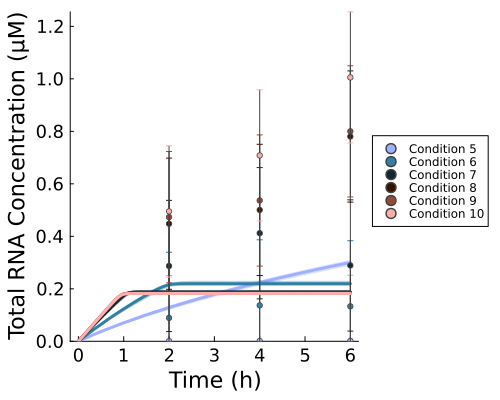

In [20]:
plot1 = plotfromcsv(fittingmodel,akamafittedparameterslist,akamafittedcovariancematrix,filename, range = 5:10,dataerrorbars = true, maximumyield = false, plotsize = (500,400),multiplot = false)

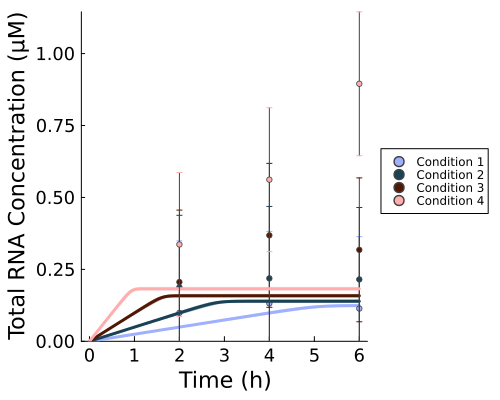

In [19]:
filename = "../data/external/samnuanrefactoreddata.csv"
plot1 = plotfromcsv(fittingmodel,akamafittedparameterslist,akamafittedcovariancematrix,filename, range = 1:4,dataerrorbars = true, maximumyield = false, plotsize = (500,400),multiplot = false)

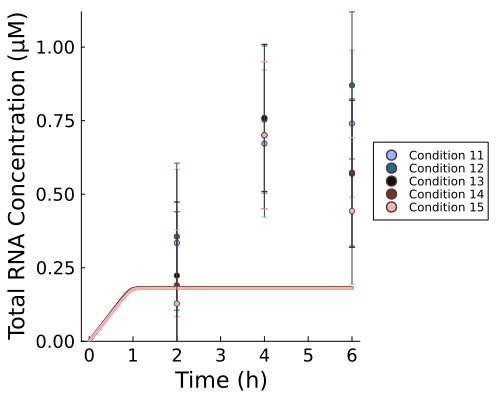

In [21]:
plot1 = plotfromcsv(fittingmodel,akamafittedparameterslist,akamafittedcovariancematrix,filename, range = 11:15,dataerrorbars = true, maximumyield = false, plotsize = (500,400),multiplot = false)

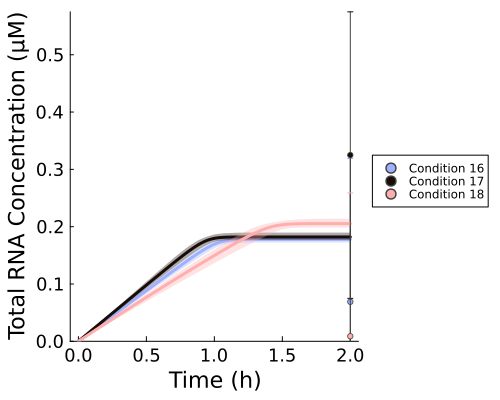

In [22]:
plot1 = plotfromcsv(fittingmodel,akamafittedparameterslist,akamafittedcovariancematrix,filename, range = 16:18,dataerrorbars = true, maximumyield = false, plotsize = (500,400),multiplot = false)

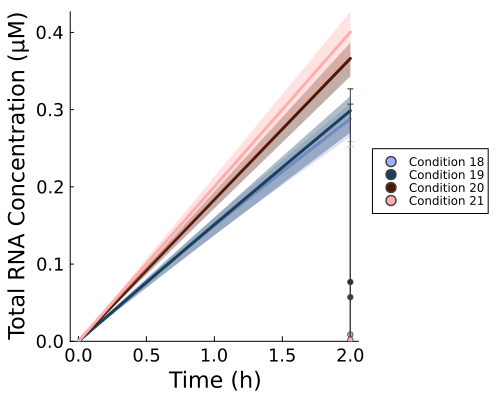

In [14]:
plot1 = plotfromcsv(fittingmodel,akamafittedparameterslist,akamafittedcovariancematrix,filename, range = 18:21,dataerrorbars = true, maximumyield = false, plotsize = (500,400),multiplot = false)

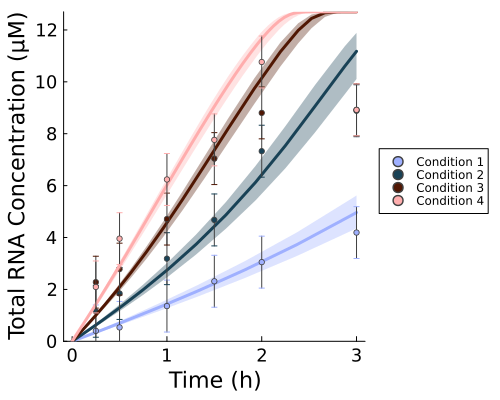

In [23]:
filename = "../data/external/pregljcdatafitting.csv"
plot1 = plotfromcsv(fittingmodel,akamafittedparameterslist,akamafittedcovariancematrix,filename, range = 1:4,dataerrorbars = true, maximumyield = false, plotsize = (500,400),multiplot = false)

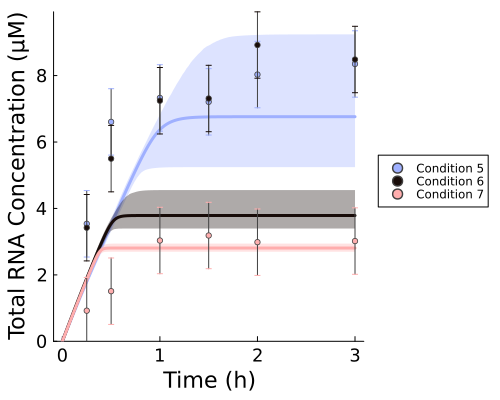

In [24]:
plot1 = plotfromcsv(fittingmodel,akamafittedparameterslist,akamafittedcovariancematrix,filename, range = 5:7,dataerrorbars = true, maximumyield = false, plotsize = (500,400),multiplot = false)

<h1>Experimental Designs<h1>

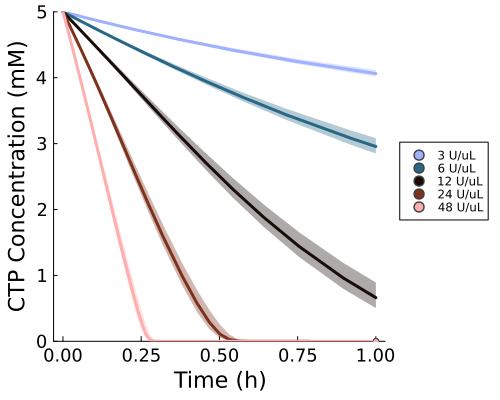

In [4]:
filename = "../data/internal/marchIVTsprint.csv"
T7lab = ["3 U/uL","6 U/uL","12 U/uL","24 U/uL","48 U/uL"]
p=plotfromcsv(fittingmodel,akamafittedparameterslist,akamafittedcovariancematrix,filename, labels = T7lab,range = 1:5,dataerrorbars = true, maximumyield = false, plotsize = (500,400), multiplot = false)
savefig(p,"../figures/predictedMarchIVTsprintinitialcurves.png")
p

<b>4: Plotting Akama fitting against new data<b>
    
First, we define the file containing our new data. The data we are adding here was collected using initial NTP concentrations of ~25 mM. That is outside of the range our model was calibrated on, meaning that we are extrapolating. Our predictions on this data are incorrect with large uncertainty. 

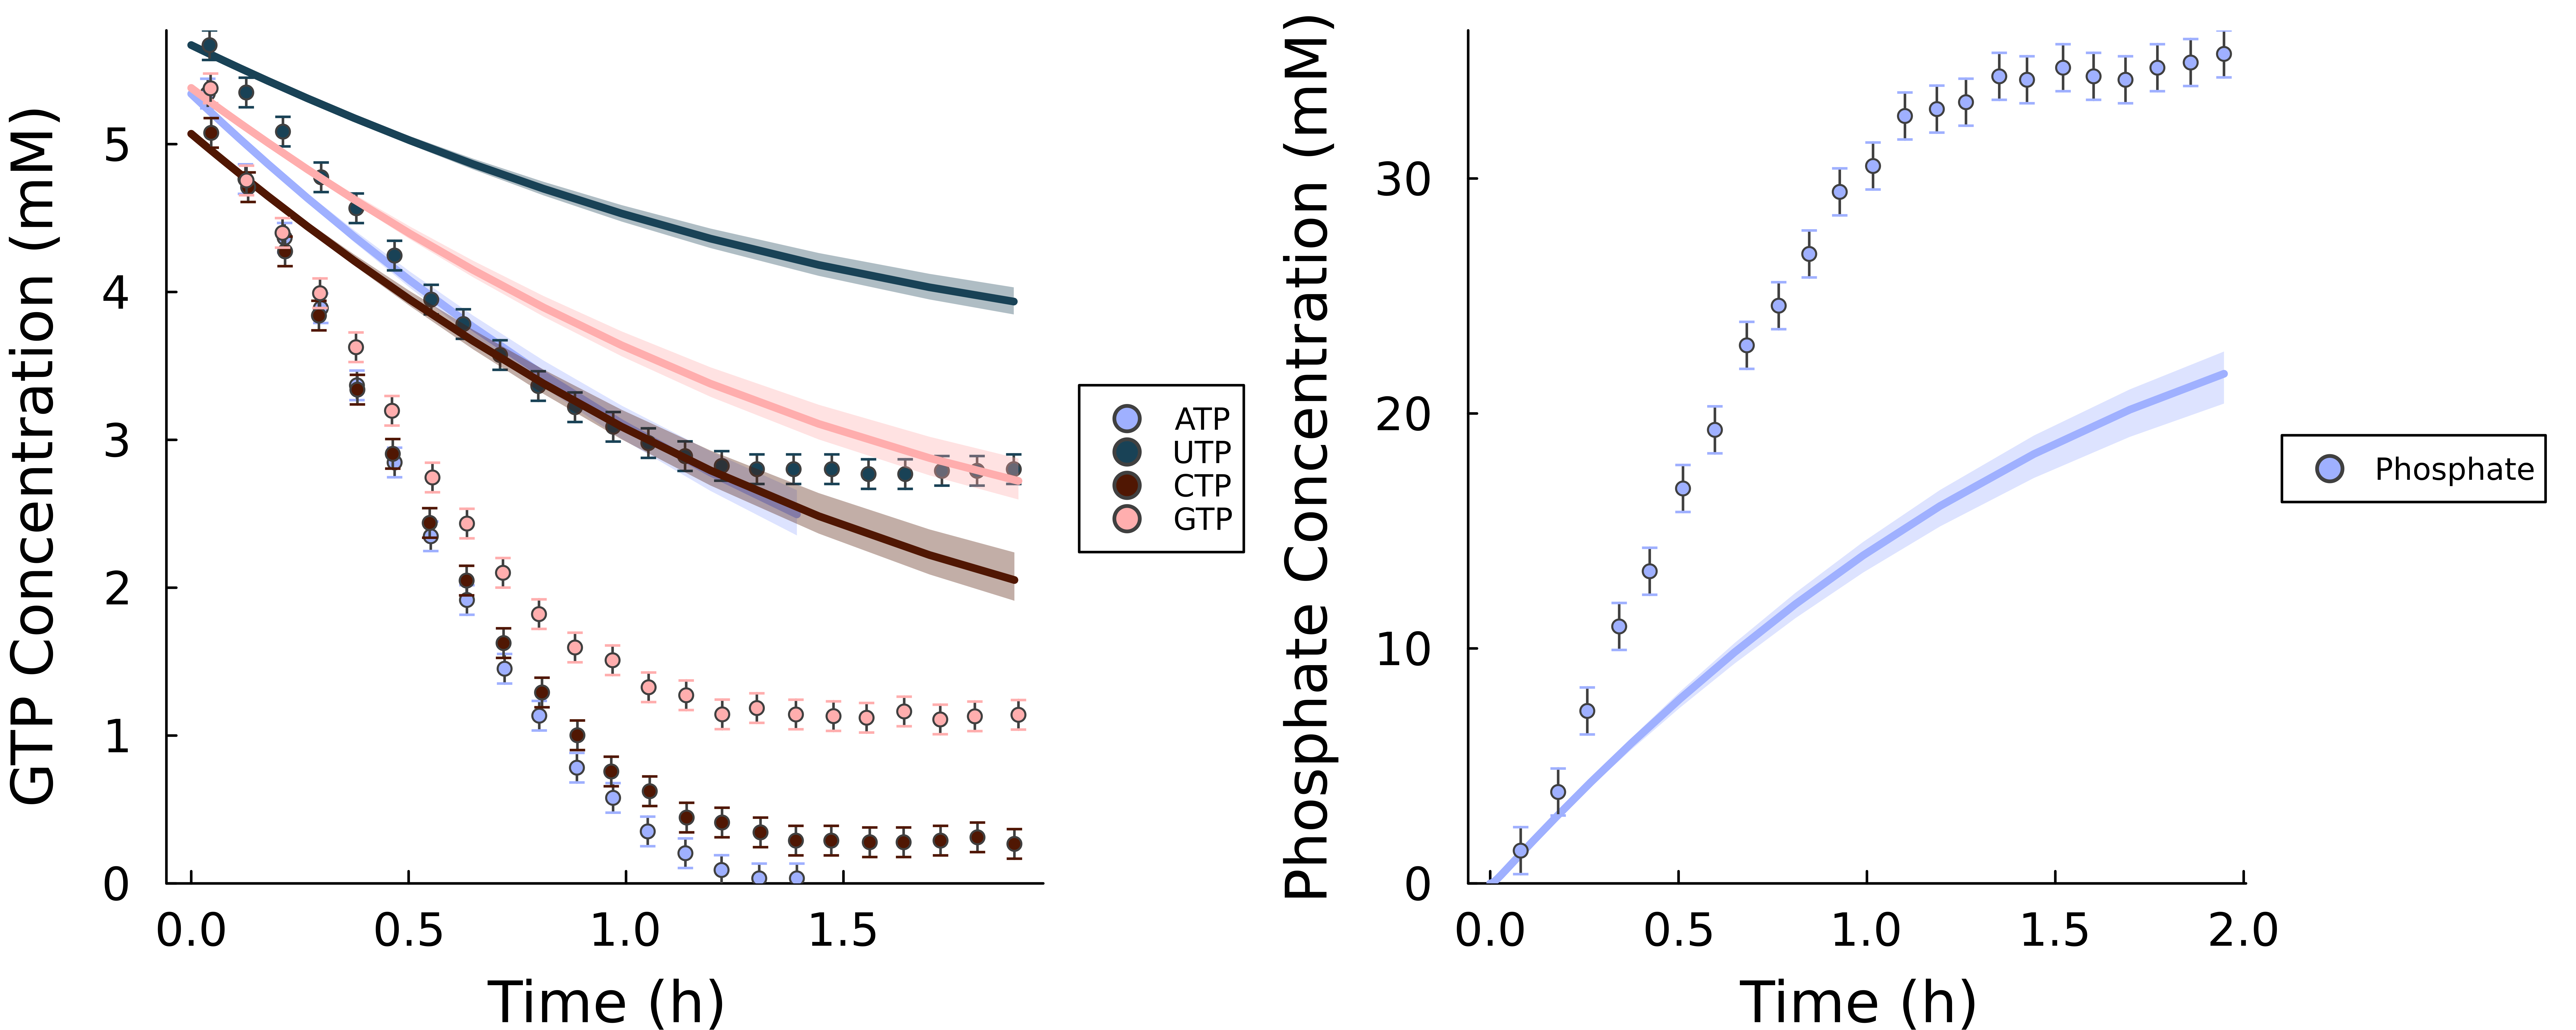

In [5]:
filename = "../data/external/pfizerNTP.csv"
pfizerplot1 = plotfromcsv(fittingmodel,akamafittedparameterslist,akamafittedcovariancematrix,filename, range = 1:4,dataerrorbars = true, maximumyield = false, plotsize = (500,400),labels = ["ATP","UTP","CTP","GTP",], multiplot = false)
pfizerplot2 = plotfromcsv(fittingmodel,akamafittedparameterslist,akamafittedcovariancematrix,filename,range = 5:5,dataerrorbars = true, maximumyield = false, plotsize = (500,400),labels = ["Phosphate","RNA"])
pfizerplotfull1 = plot(pfizerplot1,pfizerplot2, size = (1000,400), leftmargin = 5mm, bottommargin = 5mm,dpi=1000)
savefig(pfizerplotfull1,"../figures/pfizerdata_unfitted.png")
pfizerplotfull1

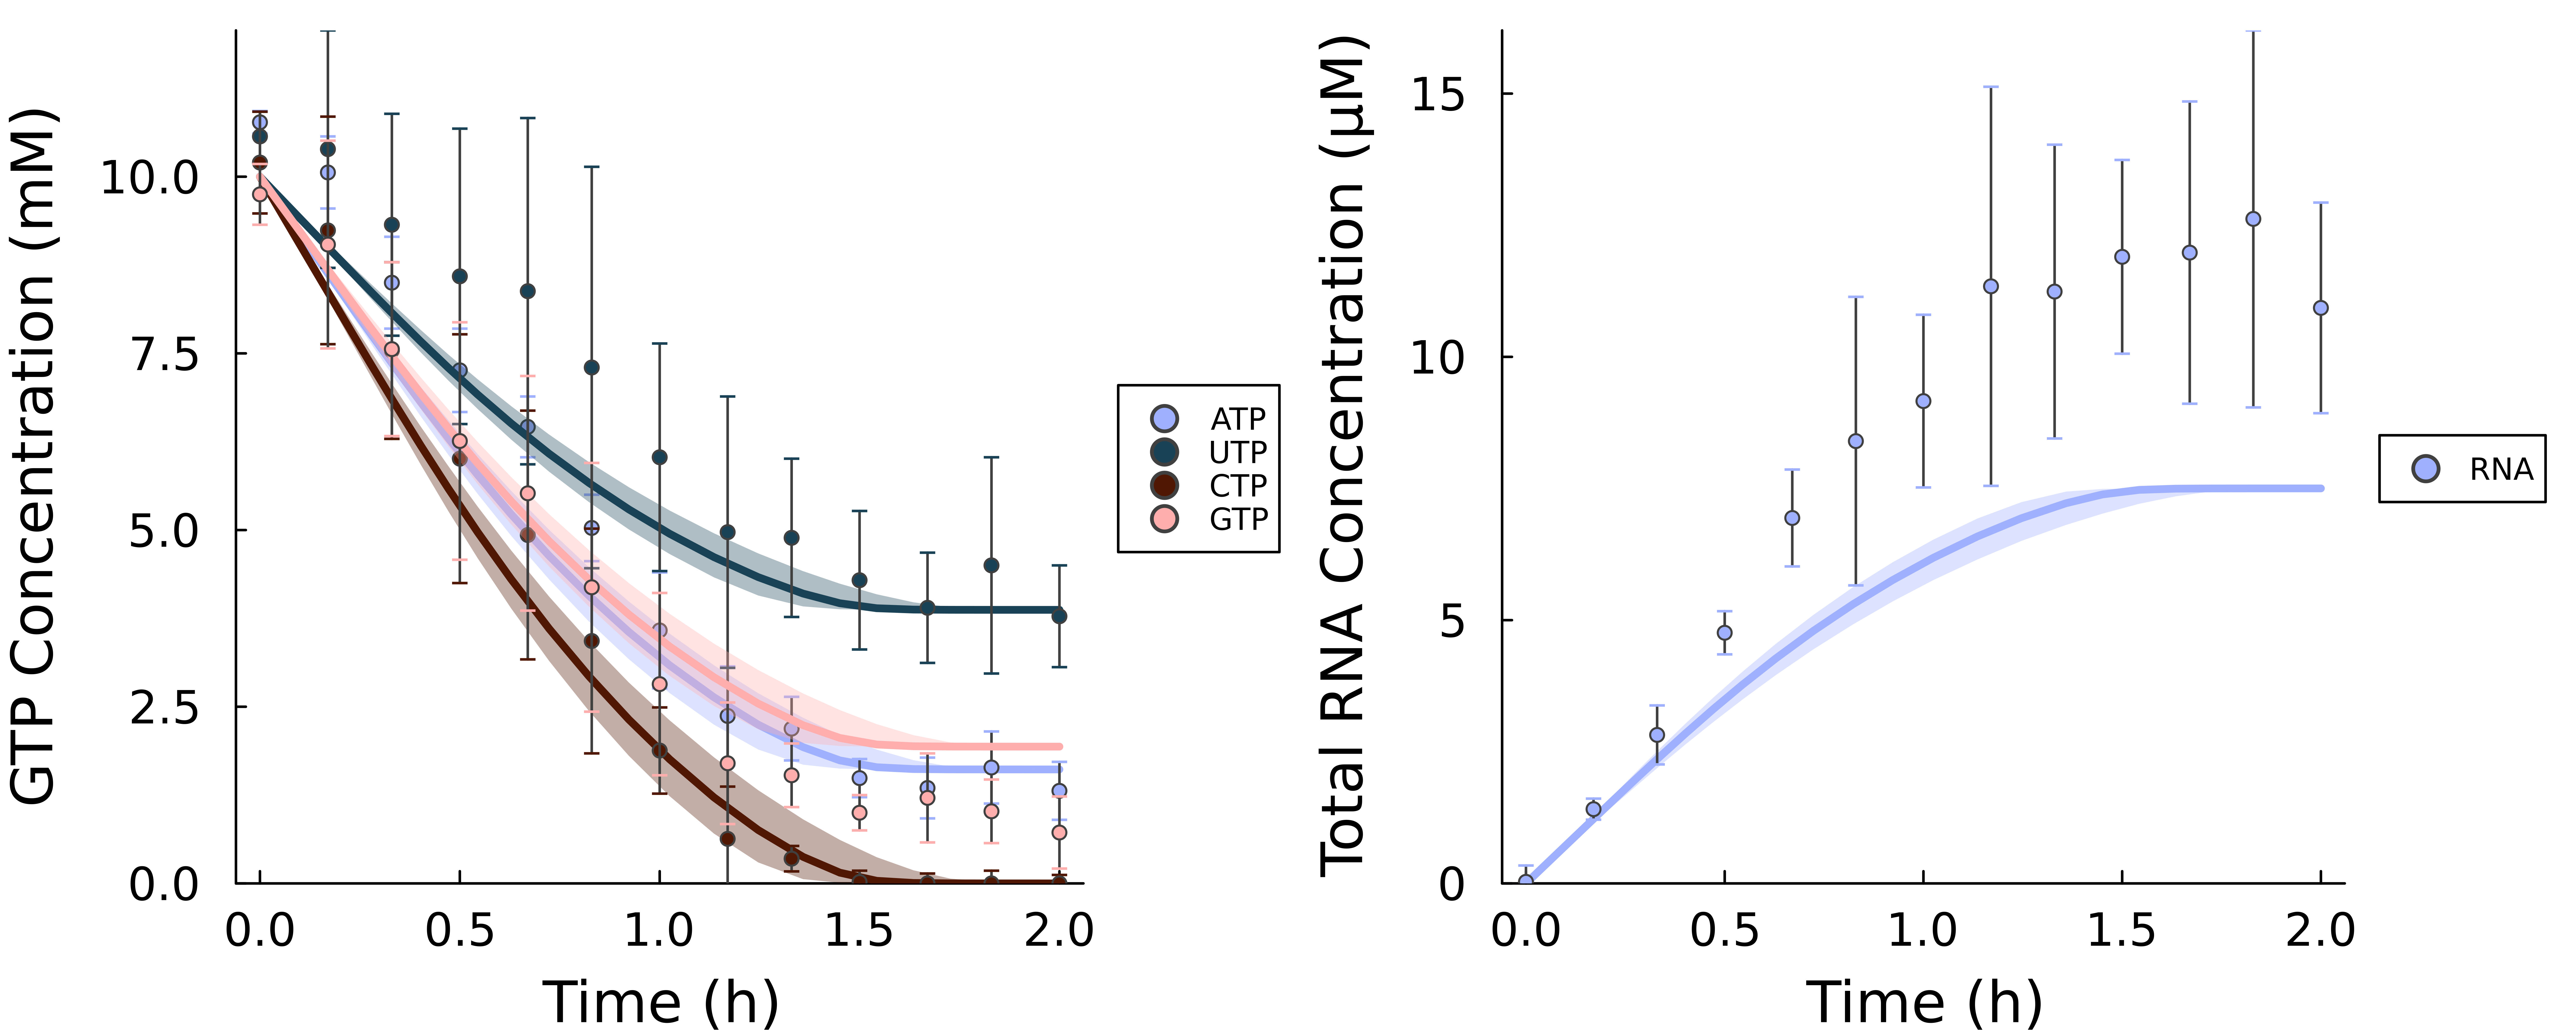

In [10]:
filename = "../data/external/welbournedata.csv"
welbourneplot1 = plotfromcsv(fittingmodel,akamafittedparameterslist,akamafittedcovariancematrix,filename, range = 1:4,dataerrorbars = true, maximumyield = false, plotsize = (500,400),labels = ["ATP","UTP","CTP","GTP",], multiplot = false)
welbourneplot2 = plotfromcsv(fittingmodel,akamafittedparameterslist,akamafittedcovariancematrix,filename,range = 5:5,dataerrorbars = true, maximumyield = false, plotsize = (500,400),labels = ["RNA"])
welbourneplotfull1 = plot(welbourneplot1,welbourneplot2, size = (1000,400), leftmargin = 5mm, bottommargin = 5mm,dpi=1000)
savefig(welbourneplotfull1,"../figures/welbournedata_unfitted.png")
welbourneplotfull1

In [ ]:
# filename = "../data/external/strubecurves.csv"
# strubeparams = akamafittedparameterslist
# strubecov = akamafittedcovariancematrix
# strubeATP = plotfromcsv(fittingmodel,strubeparams,strubecov,filename,labels = ["2.5 mM","5.0 mM","7.5 mM","10.0 mM"], range = [1,2,3,13],dataerrorbars = true, multiplot = false,multiplemaximum = true)
# plot!(title = "Changing ATP Input")
# strubeUTP = plotfromcsv(fittingmodel,strubeparams,strubecov,filename,labels = ["2.5 mM","5.0 mM","7.5 mM","10.0 mM"], range = [4,5,6,13],dataerrorbars = true, multiplot = false,multiplemaximum = true)
# plot!(title = "Changing UTP Input")
# strubeCTP = plotfromcsv(fittingmodel,strubeparams,strubecov,filename,labels = ["2.5 mM","5.0 mM","7.5 mM","10.0 mM"], range = [7,8,9,13],dataerrorbars = true, multiplot = false,multiplemaximum = true)
# plot!(title = "Changing CTP Input")
# strubeGTP = plotfromcsv(fittingmodel,strubeparams,strubecov,filename,labels = ["2.5 mM","5.0 mM","7.5 mM","10.0 mM"], range = [10,11,12,13],dataerrorbars = true, multiplot = false,multiplemaximum = true)
# plot!(title = "Changing GTP Input")
# plot(strubeATP,strubeUTP,strubeCTP,strubeGTP,layout = (2,2),size = (900,700),topmargin = 3mm, leftmargin = 2mm)

<b>4: Fitting combined Akama + new dataset<b>

We will first evaluate the residual of applying this model to the existing Akama dataset and our new data. Unsuprisingly, the loss associated with our new data is much greater than any other source.

In [11]:
printresidual(fittingmodel,modeldata,akamafittedparameterslist,customfile = true,customfilename = filename)

Total Residual:                        53649.6
Components of residual:
Concentration Trajectories (Figure 2): 390.2
Initial Reaction Rate (Figure 3A):     164.0
Mg2PPi solubility (Figure 3B):         234.6
Parameter priors:                      60.1
Custom Data:                           52800.7


<b>5: Optimizing model with new dataset<b>

In [12]:
res = (model,data,x) -> customresidualeval(model,data,filename,x)
optim=localopt(fittingmodel, modeldata,300,akamafittedparameterslist,res,verbose = true)
customfittedparamslist = optim[4]
customfittedparams = fullparameterset(fittingmodel,customfittedparamslist)
customcovariancemat = getcovariancematrix(fittingmodel,modeldata,customfittedparamslist,customfile = true,customfilename = filename)
writedlm( "../outputs/customfittedparameters.csv",  customfittedparamslist, ',')
writedlm( "../outputs/customcovariancematrix.csv",  customcovariancemat, ',')

53649.636294806514
66246.09574345406
13512.174822404477
10602.587542037323
9907.948310171754
9237.99362948695
7288.203000109449
5070.490871551
4658.7917946836305
4401.265687526754
4183.67659143263
4127.587051796101
3940.6008068774113
3652.1472425908
3377.7692165992275
3166.1570958101183
2915.5863222137864
2812.422043656817
2608.169950471304
2569.254972976676
2534.684901755973
2495.258660613246
2475.112617933691
128136.10040030844
2470.038396491758
2447.1487456442974
2428.300034233292
2413.362585240486
2395.94880693587
2380.646109932613
2356.922140885666
2297.938986228305
2258.493517147085
2215.9395946276372
2213.685917910968
2206.6479217793003
2203.969887235285
2200.1427130158836
2193.955554814696
2186.380283606164
2182.9124540590333
2180.5353829309197
2175.1006702010072
2162.45340453365
2143.3135204607115
2128.247675617233
2118.7207799782186
2114.090811358952
17074.275697310484
2181.8221555309437
2113.2850552919
2110.0396560863887
2102.7363376949043
2101.0828307461484
2099.85860607834

The fitting process has dramatically decreased our overall loss, specifically the loss associated with our new data. 

In [13]:
printresidual(fittingmodel,modeldata,customfittedparamslist,customfile = true,customfilename = filename)

Total Residual:                        2086.5
Components of residual:
Concentration Trajectories (Figure 2): 1190.8
Initial Reaction Rate (Figure 3A):     137.3
Mg2PPi solubility (Figure 3B):         479.7
Parameter priors:                      60.9
Custom Data:                           217.9


<b>6: Plotting Figures with new parameter fitting<b>
    
Once we have performed fitting, it is important to check whether our fits to the original data set are reasonable. If the model cannot fit both the original dataset and the new data, it is a sign that the model structure or original data is somehow incongruent with the new data. In this case, the model is able to reasonably fit both the original and new datasets. 

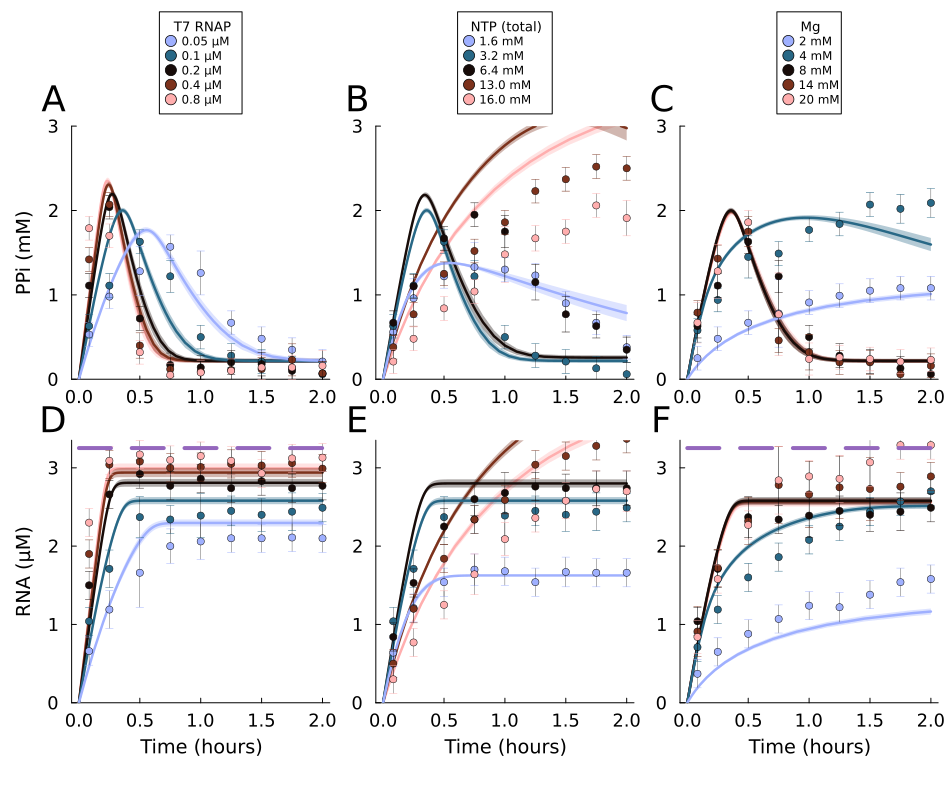

In [14]:
plt = revision1plot1(fittingmodel,modeldata, customfittedparams, customcovariancemat, true,true)

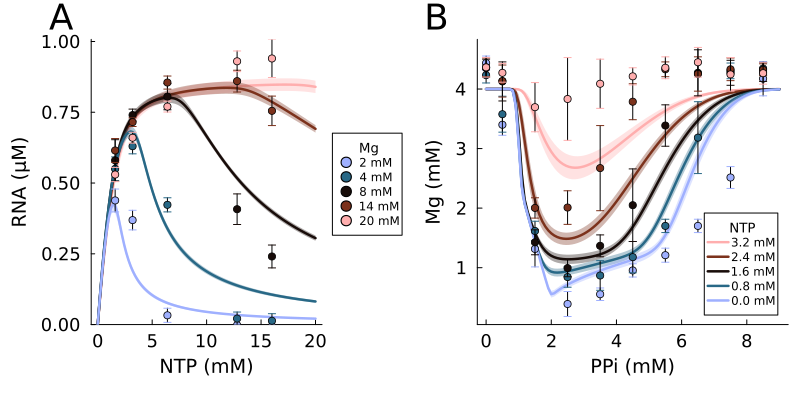

In [15]:
plt = revision1plot2(fittingmodel,modeldata, customfittedparams, customcovariancemat, true,true)

In [ ]:
# filename = "../data/external/strubecurves.csv"
# strubeparams = customfittedparamslist
# strubecov = customcovariancemat
# strubeATP = plotfromcsv(fittingmodel,strubeparams,strubecov,filename,labels = ["2.5 mM","5.0 mM","7.5 mM","10.0 mM"], range = [1,2,3,18],dataerrorbars = true, multiplot = false,multiplemaximum = true)
# plot!(title = "Changing ATP Input")
# strubeUTP = plotfromcsv(fittingmodel,strubeparams,strubecov,filename,labels = ["2.5 mM","5.0 mM","7.5 mM","10.0 mM"], range = [4,5,6,18],dataerrorbars = true, multiplot = false,multiplemaximum = true)
# plot!(title = "Changing UTP Input")
# strubeCTP = plotfromcsv(fittingmodel,strubeparams,strubecov,filename,labels = ["2.5 mM","5.0 mM","7.5 mM","10.0 mM"], range = [7,8,9,18],dataerrorbars = true, multiplot = false,multiplemaximum = true)
# plot!(title = "Changing CTP Input")
# strubeGTP = plotfromcsv(fittingmodel,strubeparams,strubecov,filename,labels = ["2.5 mM","5.0 mM","7.5 mM","10.0 mM"], range = [10,11,12,18],dataerrorbars = true, multiplot = false,multiplemaximum = true)
# plot!(title = "Changing GTP Input")
# plot(strubeATP,strubeUTP,strubeCTP,strubeGTP,layout = (2,2),size = (900,700),topmargin = 3mm, leftmargin = 2mm)

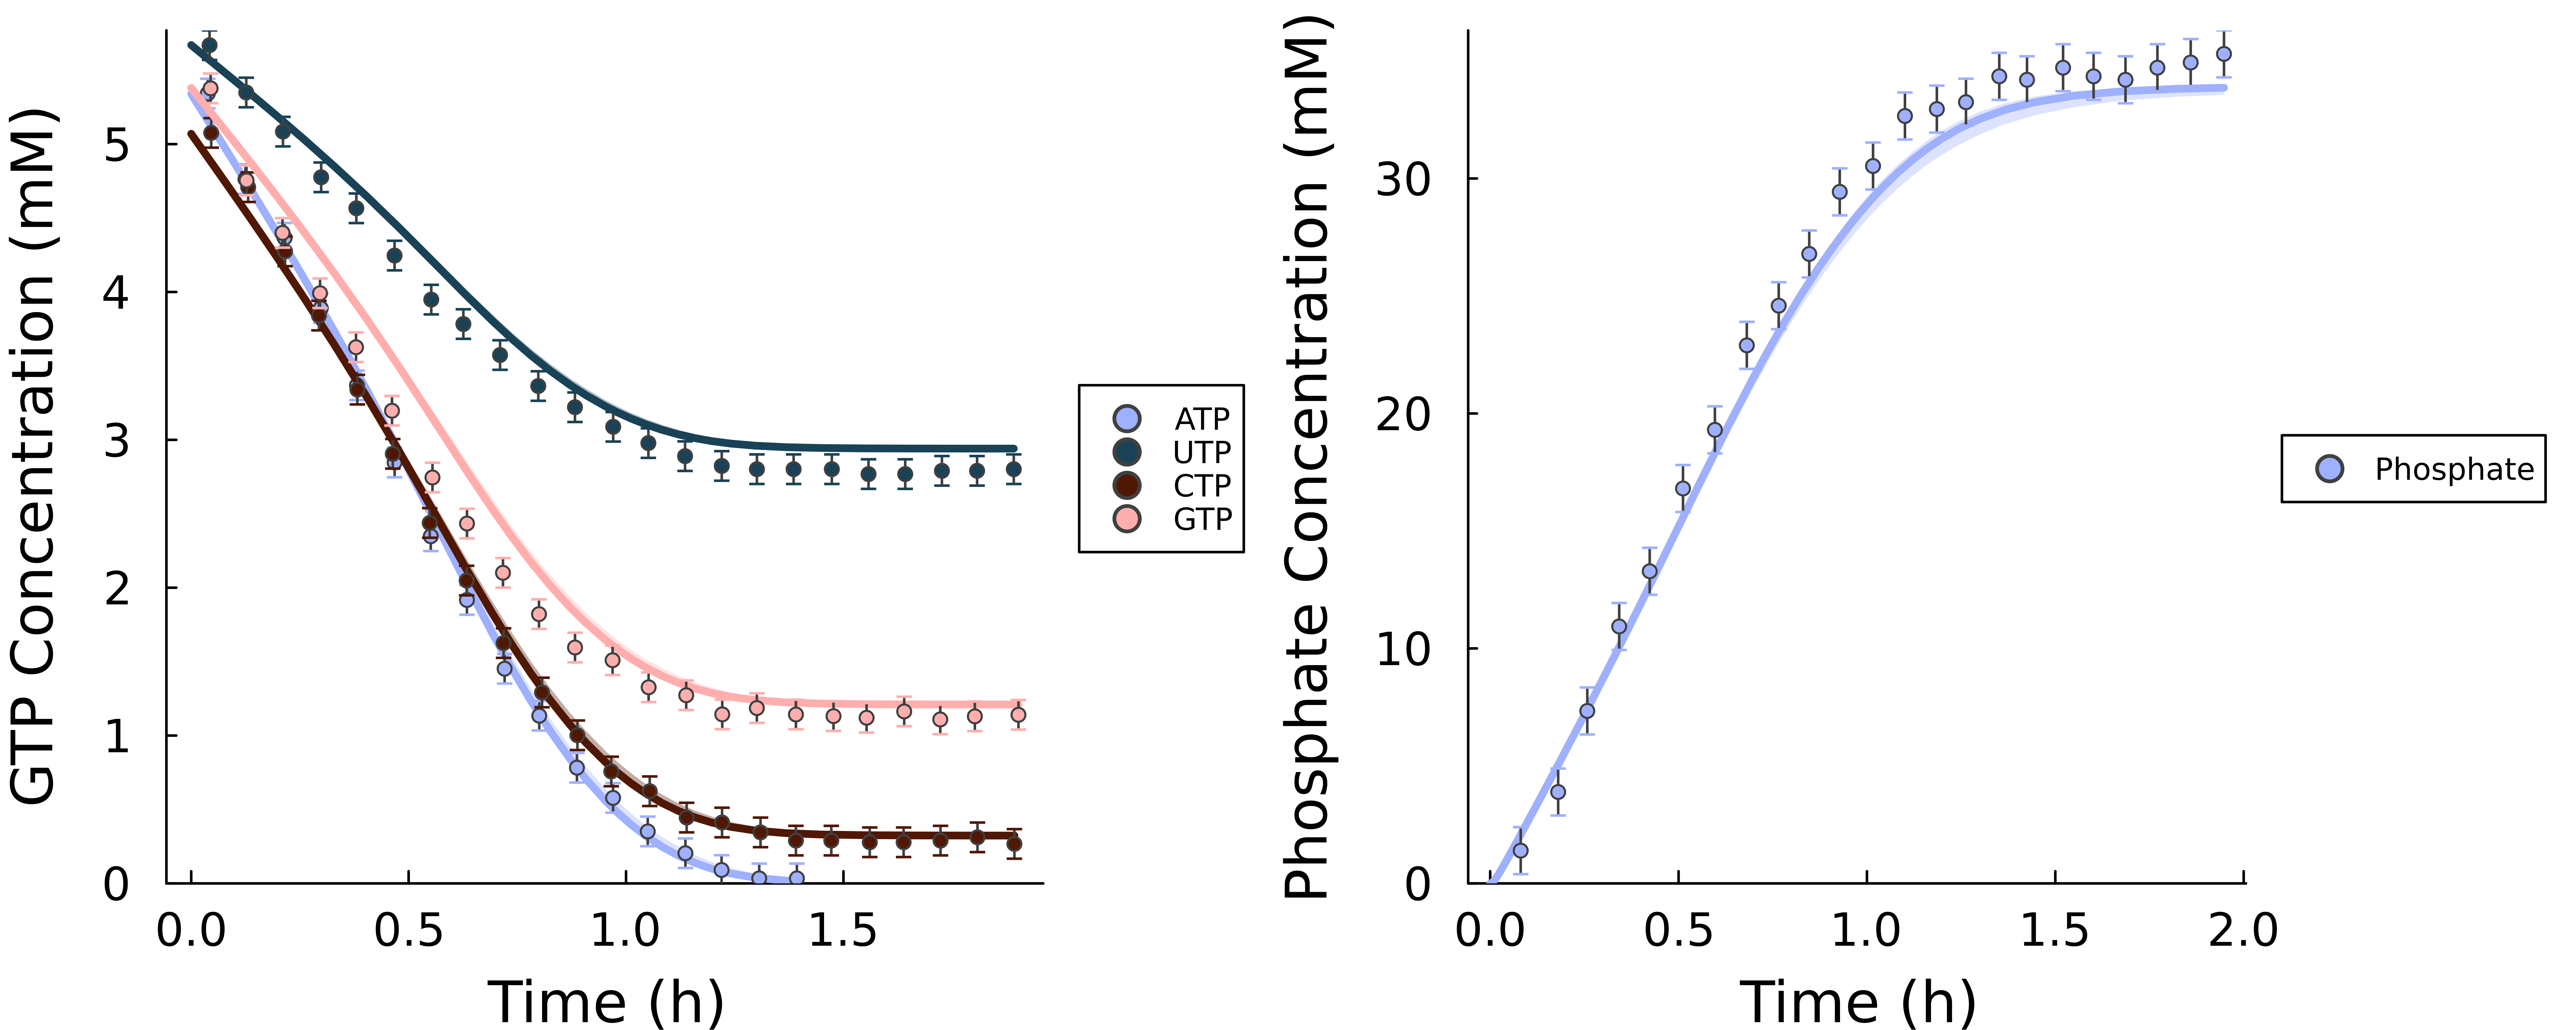

In [16]:
pfizerplot21 = plotfromcsv(fittingmodel,customfittedparamslist, customcovariancemat,"../data/external/pfizerNTP.csv",range = 1:4,dataerrorbars = true, maximumyield = false, plotsize = (800,600),labels = ["ATP","UTP","CTP","GTP",], multiplot = false)
pfizerplot22 = plotfromcsv(fittingmodel,customfittedparamslist, customcovariancemat,"../data/external/pfizerNTP.csv",range = 5:5,dataerrorbars = true, maximumyield = false, plotsize = (500,400),labels = ["Phosphate","RNA"])
pfizerplotfull2 = plot(pfizerplot21,pfizerplot22, size = (1000,400), leftmargin = 5mm, bottommargin = 5mm,dpi=1000)
savefig(pfizerplotfull2,"../figures/pfizerdata_validation.png")
pfizerplotfull2